# Capstone Project

----

## Requirements

Whichever problem you choose to analyze, general requirements are as follow:

#### Exploratory Data Analysis
* Describe the data with basic statistical parameters - mean, median, quantiles, etc. Use parameters that give you the most important statistical insights of the data.
* Grouping the data and analyzing the groups - using Pandas aggregate methods.
* Work with features - handle missing data if needed, use pandas date APIs.
* Manipulate datasets - use joins in needed.
* Visualize the data - you can use line, scatter, histogram plots, density plots, regplots, etc.

#### Statistical hypothesis testing
* Use at least one statistical significance test.
* Report p-values.
* Use visualizations.

#### Modeling
* Visualize data with dimensionality reduction algorithms.
* Perform cluster analysis.
* Use a linear model to explain relationships by correlation and predict new values.

#### Presentation
* Present the project - the data, methods and results.

## Problem

#### Fatal Police Shooting in United States

<div><img width="400px" height="auto" src="https://images.unsplash.com/photo-1606352466047-7cef02b312bb?ixlib=rb-1.2.1&ixid=MXwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHw%3D&auto=format&fit=crop&w=1662&q=80" /></div>

[Police brutality in the United States](https://en.wikipedia.org/wiki/Police_brutality_in_the_United_States) has been an nationwide issue since the 20th century. Public safety of U.S. citizens is a typical argument to justify the controversially high number of fatal shootings.

You are a contractor to the United States Department of Justice. **You have been given a case to investigate fatal police shootings throughout the United States of America, provide a list of issues, and propose a plan on how to tackle these issues**.

The department offered some tips - the public opinion indicates that there's something systematically fishy of police actions against civilians, some states differ from other, some cities are different from others, race equality is still an unanswered question, there's some talk about huge spendings on police, rumors about mental issues of those getting shot. Government is all about prioritizing - use the data to list issues with the police activity and propose a plan which issues to tackle first and how.

## Evaluation Criteria

- Code quality
- Fulfillment of the idea
- Adherence to the requirements
- Delivery of the presentation

#### Statistical hypothesis testing
- Correct statistical test method is used, based on the situation.
- Reasoning on chosen statistical significance level.

#### Modeling
- Both PCA and T-SNE algorithms are used.

In [ ]:
# Data Analysis
import pandas as pd
import numpy as np
import datetime as dt

# Data Visualization
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'
sns.set()

# Data statistics:
import scipy.stats as stats
from statsmodels.stats.proportion import proportions_ztest, proportion_confint
import statsmodels.api as sm
from scipy.stats import t

# PCA & T-sne:
from sklearn.preprocessing import OneHotEncoder 
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA 
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

# Model creation:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score




In [ ]:
# Data set is updated and contains information from 2015 to the end of 2020
data = pd.read_csv('https://raw.githubusercontent.com/mantaspieza/US-police-shootings/main/csv/fatal-police-shootings-data.csv')

# additional dataset with population of US states in 2018
state_population = pd.read_csv('https://raw.githubusercontent.com/mantaspieza/US-police-shootings/main/csv/State%20Populations.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6061 entries, 0 to 6060
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       6061 non-null   int64  
 1   name                     5844 non-null   object 
 2   date                     6061 non-null   object 
 3   manner_of_death          6061 non-null   object 
 4   armed                    5853 non-null   object 
 5   age                      5797 non-null   float64
 6   gender                   6060 non-null   object 
 7   race                     5477 non-null   object 
 8   city                     6061 non-null   object 
 9   state                    6061 non-null   object 
 10  signs_of_mental_illness  6061 non-null   bool   
 11  threat_level             6061 non-null   object 
 12  flee                     5713 non-null   object 
 13  body_camera              6061 non-null   bool   
 14  longitude               

In [ ]:
state_population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   State            51 non-null     object
 1   2018 Population  51 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 944.0+ bytes


In [ ]:
# Replacing state names in state population data set:

state_population['State'] = state_population['State'].replace(
    {'California' : 'CA', 'Texas' : 'TX', 'Florida' : 'FL', 'New York' : 'NY',
     'Pennsylvania' : 'PA', 'Illinois' : 'IL', 'Ohio' : 'OH', 'Georgia' : 'GA',
     'North Carolina' : 'NC', 'Michigan' : 'MI', 'New Jersey' : 'NJ', 
     'Virginia' : 'VA', 'Washington' : 'WA', 'Arizona' : 'AZ', 
     'Massachusetts' : 'MA', 'Tennessee' : 'TN', 'Indiana' : 'IN', 
     'Missouri' : 'MO', 'Maryland' : 'MD', 'Wisconsin' : 'WI',
     'Colorado' : 'CO', 'Minnesota' : 'MN', 'South Carolina' : 'SC',
     'Alabama' : 'AL', 'Louisiana' : 'LA','Kentucky' : 'KY', 'Oregon' : 'OR',
     'Oklahoma' : 'OK', 'Connecticut' : 'CT', 'Iowa' : 'IA', 'Utah' : 'UT',
     'Nevada' : 'NV', 'Arkansas' : 'AR', 'Mississippi' : 'MS', 'Kansas' : 'KS',
     'New Mexico' : 'NM', 'Nebraska' : 'NE', 'West Virginia' : 'WV', 
     'Idaho' : 'ID', 'Hawaii' : 'HI', 'New Hampshire' : 'NH', 'Maine' : 'ME',
     'Montana' : 'MT', 'Rhode Island' : 'RI', 'Delaware' : 'DE',
     'South Dakota' : 'SD', 'North Dakota' : 'ND', 'Alaska' : 'AK',
     'District of Columbia' : 'DC', 'Vermont' : 'VT', 'Wyoming' : 'WY'},)

# Fixing column names:
state_population = state_population.rename(columns={'State':'state','2018 Population':'population'})
state_population.head()

,state,population
0,CA,39776830
1,TX,28704330
2,FL,21312211
3,NY,19862512
4,PA,12823989


In [ ]:
# Fixing data in Fatal police shooting dataset:
  # Selecting information before the beginning of 2021
data = data[(data['date'] < "2021-01-01")]
  # from obj -> datetime
data['date'] = pd.to_datetime(data['date']) 
  # sensitive information is removed
data = data.drop('name', axis=1) 
  # Longitude, Latitude and geocoding information removed:
data = data.drop(['longitude','latitude','is_geocoding_exact'],
                 axis=1)

# replacing / dropping N/A values: 
  # With "Not-fleeing" as it is dominant feature in column:
    # 327 values changed
data.flee = data.flee.replace(np.nan, 'Not fleeing')
data.flee = data.flee.replace(['Other', 'Car', 'Foot'], "Fleeing")

  # Making race names more describtive:
data.race = data.race.replace(
    ['A',       'W',     'B',     'N',       'H',        'O' ],
    ['asian', 'white', 'black', 'native', 'hispanic', 'other'])
  # Making genders more describtive
data.gender = data.gender.replace(['M','F'],['Male','Female'])

  # Dropping missing values in gender, race columns
    # as replacing them might be misleading.
data = data.dropna(axis=0, how='any')

  #aditional columns created:
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day

data.head()

,id,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,year,month,day
0,3,2015-01-02,shot,gun,53.0,Male,asian,Shelton,WA,True,attack,Not fleeing,False,2015,1,2
1,4,2015-01-02,shot,gun,47.0,Male,white,Aloha,OR,False,attack,Not fleeing,False,2015,1,2
2,5,2015-01-03,shot and Tasered,unarmed,23.0,Male,hispanic,Wichita,KS,False,other,Not fleeing,False,2015,1,3
3,8,2015-01-04,shot,toy weapon,32.0,Male,white,San Francisco,CA,True,attack,Not fleeing,False,2015,1,4
4,9,2015-01-04,shot,nail gun,39.0,Male,hispanic,Evans,CO,False,attack,Not fleeing,False,2015,1,4


In [ ]:
data.isna().sum()

id                         0
date                       0
manner_of_death            0
armed                      0
age                        0
gender                     0
race                       0
city                       0
state                      0
signs_of_mental_illness    0
threat_level               0
flee                       0
body_camera                0
year                       0
month                      0
day                        0
dtype: int64


#### Exploratory Data Analysis

Requirements :

* Describe the data with basic statistical parameters - mean, median, quantiles, etc. Use parameters that give you the most important statistical insights of the data.
* Grouping the data and analyzing the groups - using Pandas aggregate methods.
* Work with features - handle missing data if needed, use pandas date APIs.
* Manipulate datasets - use joins in needed.
* Visualize the data - you can use line, scatter, histogram plots, density plots, regplots, etc.

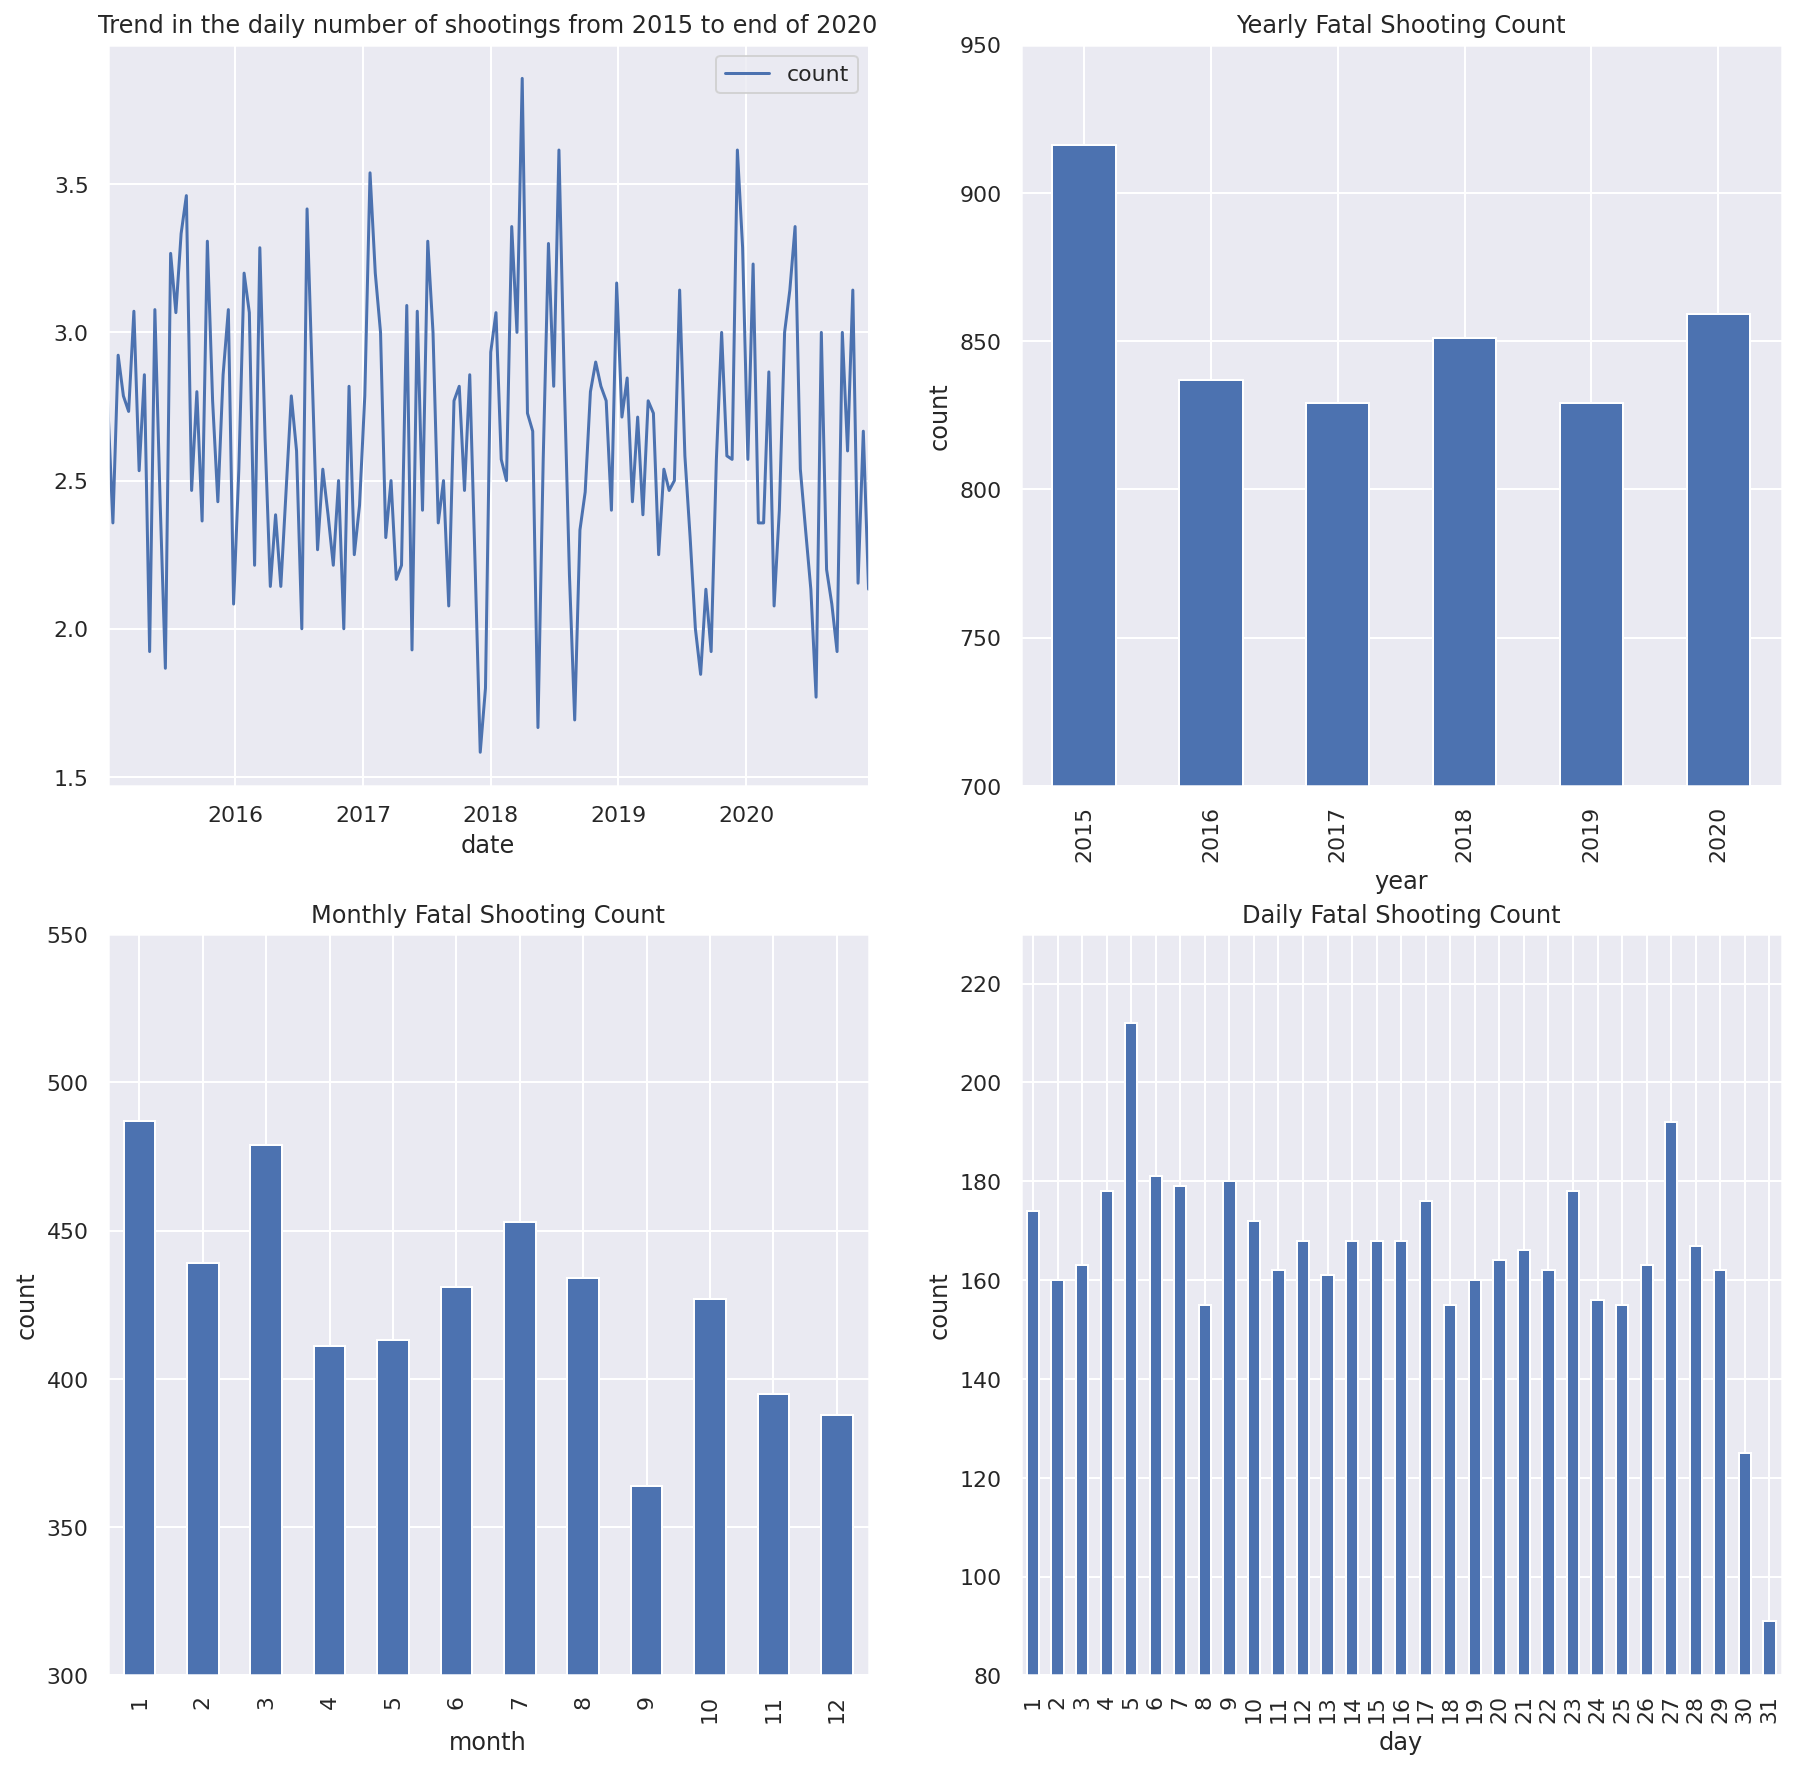

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2,squeeze=False, figsize=(15,15))

bydate = data[['date','id']].groupby('date').count().sort_values(by='date')
bydate.rename(columns={"id":'count'}, inplace=True)
bydate.resample('15D').mean().plot(
    title=('Trend in the daily number of shootings from 2015 to end of 2020'),ax=ax1)

data.groupby('year').count()['id'].plot(
    kind='bar', ylim=(700,950), ylabel=('count'),
    title=('Yearly Fatal Shooting Count'), ax=ax2)                                

data.groupby('month').count()['id'].plot(
    kind='bar', ylim=(300,550), ylabel=('count'),
    title=('Monthly Fatal Shooting Count'), ax=ax3)

data.groupby('day').count()['id'].plot(
    kind='bar', ylim=(80,230), ylabel=('count'),
    title=('Daily Fatal Shooting Count'), ax=ax4)



Eventhough we can see just a little the difference between the trend of daily shootings from 2015 to the end of 2020. The total count of yearly deaths are decreasing yearly as we can see on the graph at top right corner.  
What is more, we can see the total mothly count shows us that the most deaths are noticed at the begining of the year and during the summer.  
Total daily death count represents quite even division throughout the days of the month.  

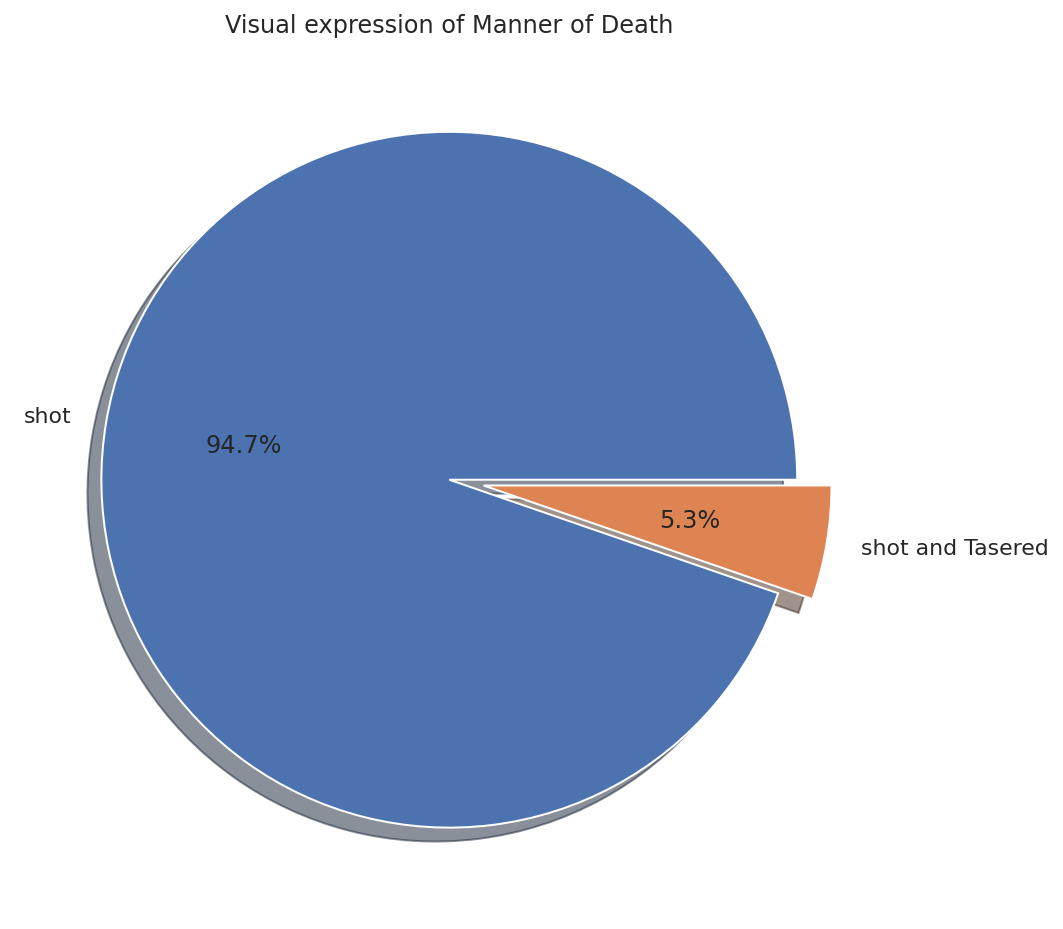

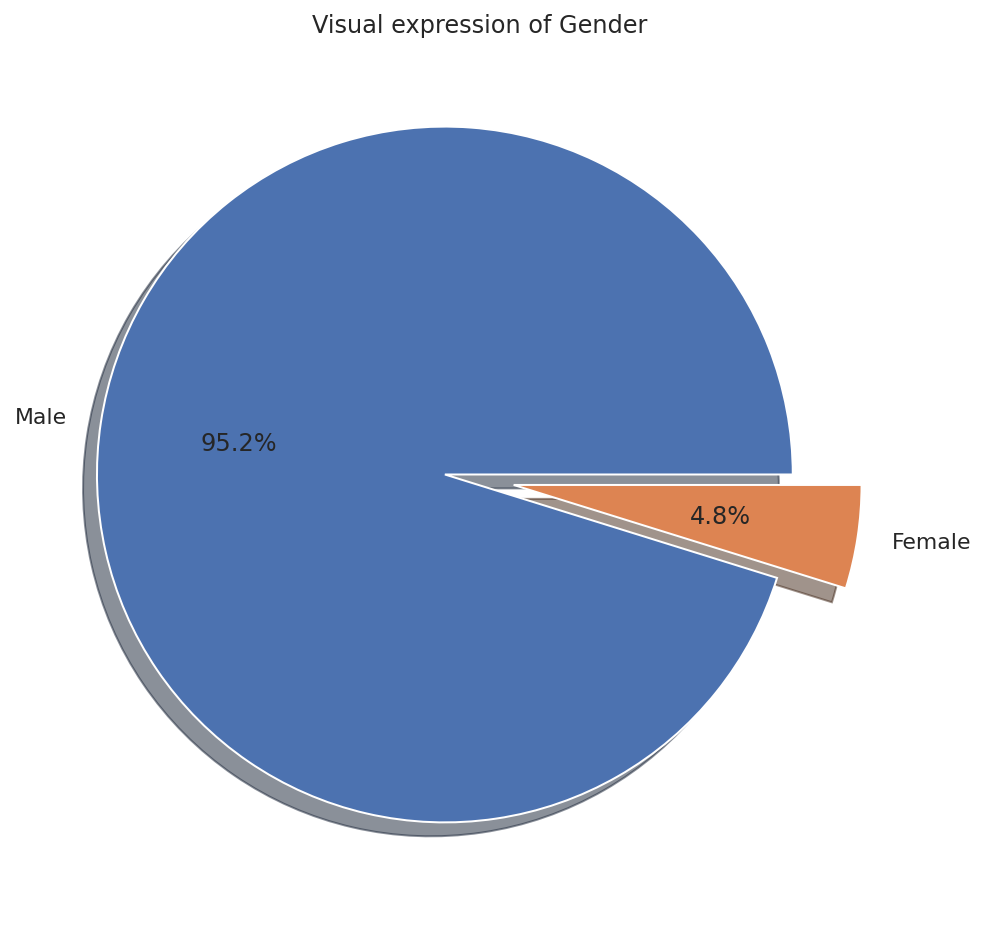

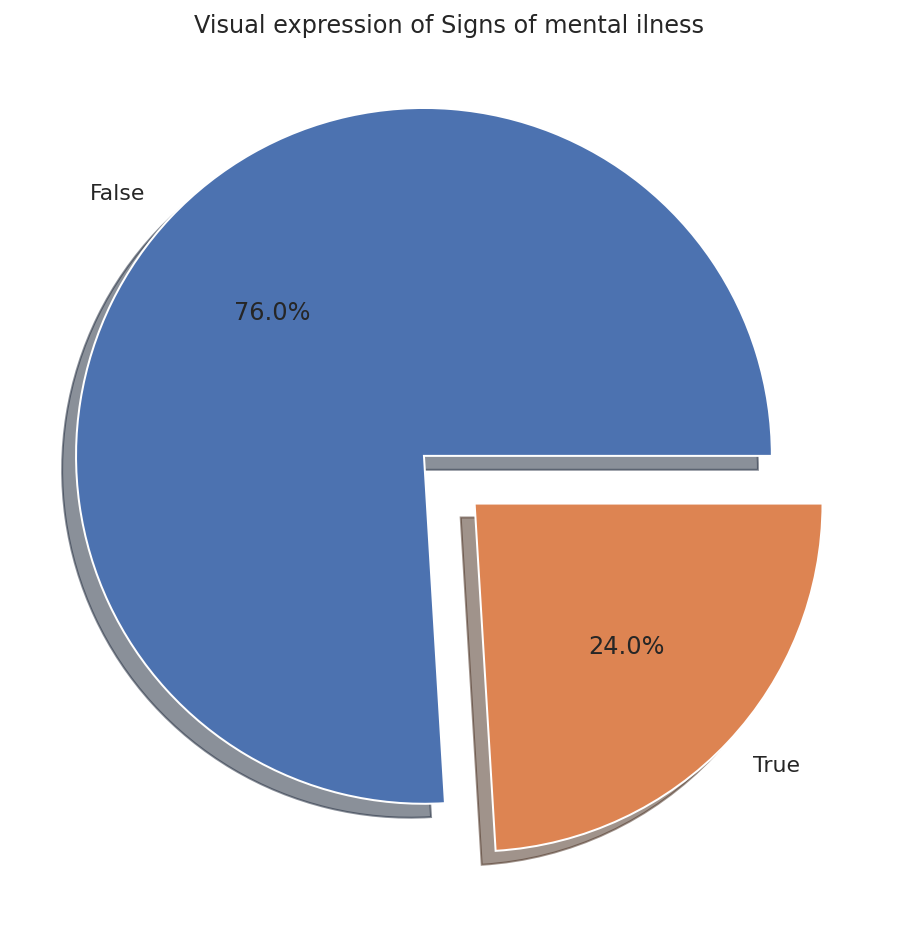

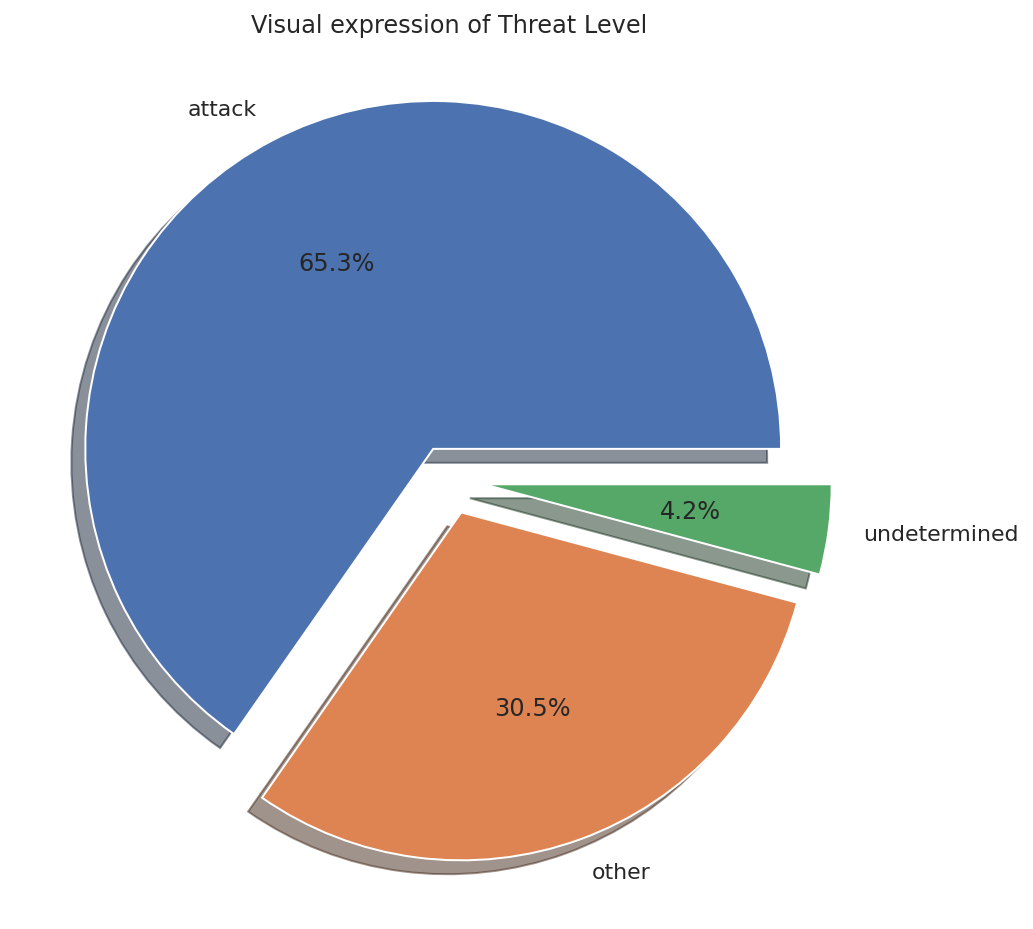

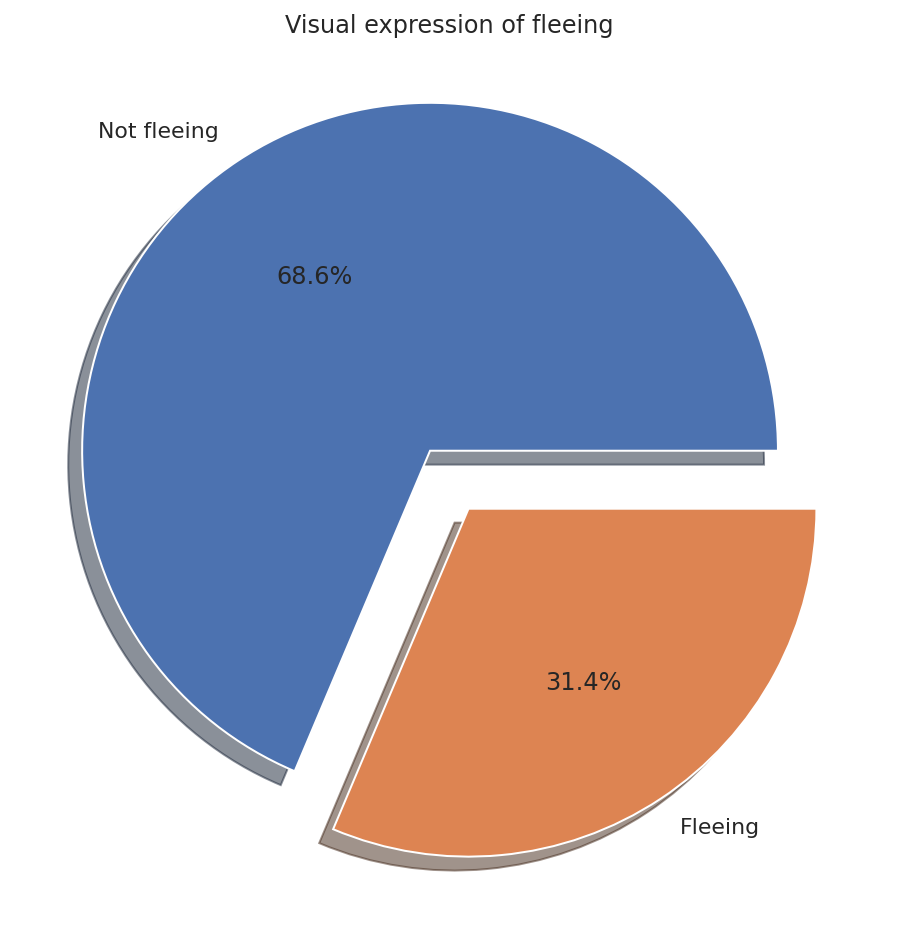

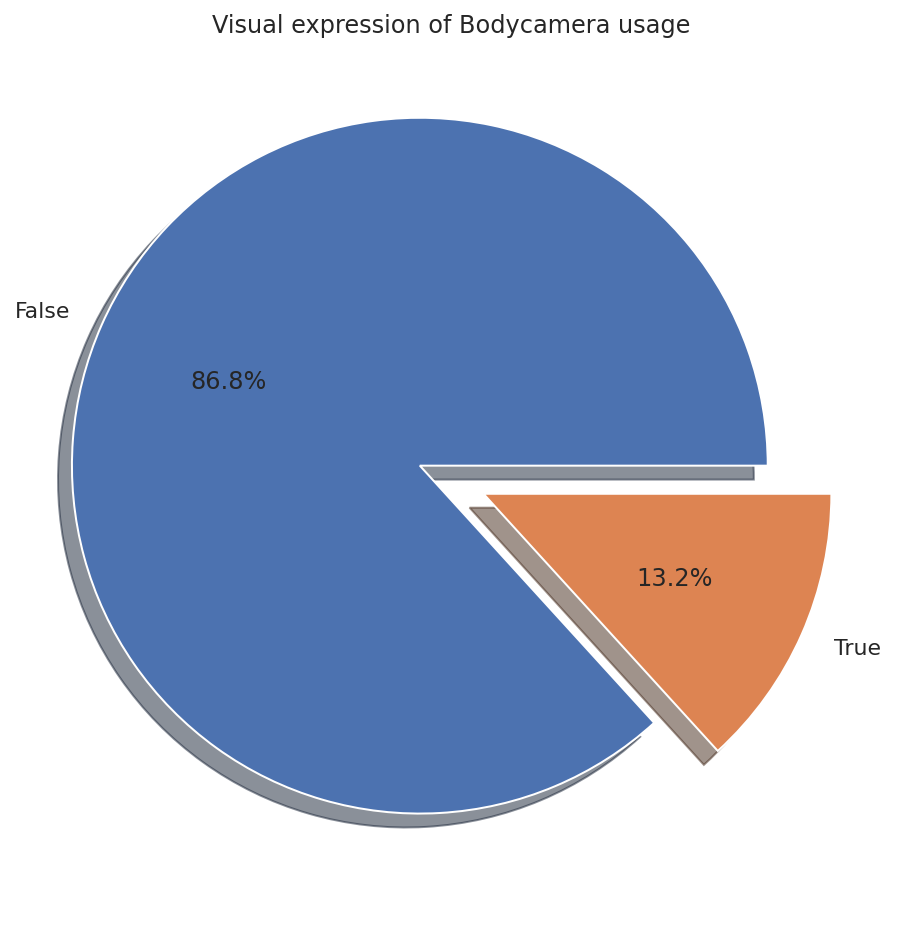

In [ ]:
# visual representation of categorical columns of dataset:

plt.figure(0, figsize=(8,8))
data.manner_of_death.value_counts().plot.pie(
    title=('Visual expression of Manner of Death'),autopct="%.1f%%", explode=(0,0.1),shadow = True, ylabel=(''))

plt.figure(1, figsize=(8,8))
data.gender.value_counts().plot.pie(
    title=('Visual expression of Gender'),autopct="%.1f%%", explode=(.1,0.1),shadow = True,
    ylabel=(''))
plt.figure(2, figsize=(8,8))
data.signs_of_mental_illness.value_counts().plot.pie(
    title=('Visual expression of Signs of mental ilness'),autopct="%.1f%%", explode=(.1,0.1),shadow = True,
    ylabel=(''))
plt.figure(3, figsize=(8,8))
data.threat_level.value_counts().plot.pie(
    title=('Visual expression of Threat Level'),autopct="%.1f%%", explode=(0.1,0.1,0.1),shadow = True, ylabel=(''))
plt.figure(4, figsize=(8,8))
data.flee.value_counts().plot.pie(
    title=('Visual expression of fleeing'),autopct="%.1f%%", explode=(0.1,0.1),shadow = True,
    ylabel=(''))
plt.figure(5, figsize=(8,8))
data.body_camera.value_counts().plot.pie(
    title=('Visual expression of Bodycamera usage'),autopct="%.1f%%", explode=(0.1,0.1),shadow = True,
    ylabel=(''))

plt.show()

We can see from the pie charts above:
* 94,7% of victims were shot and 5,3% were tasered and shot.
* There are only 4,8% of women deaths.
* 24% of all victims had signs of mental illness
* Only 65,3% of all deaths were direct attack on officer.
* Just 31,4% of victims were shot while were fleeing.
* Only 13.2% of all deaths were at least partly captured on officers body camera.

As the victims were shot 94,7 percent of the time without trying to stop them in other way ( for example using taser), let's dig deeper into the weapons which were used against officers.



In [ ]:
weapon = data.groupby('armed').count()['id']
fig = px.histogram(data.armed, x='armed', histfunc='count')
fig.update_layout(
    title_text='Count of Arms Used by Victims', 
    xaxis_title_text='Arms', 
    yaxis_title_text='Count', 
    bargap=0.1, 
    bargroupgap=0.1 )

In [ ]:
data['armed'].value_counts(ascending=False)

gun                                 3016
knife                                777
unarmed                              376
toy weapon                           186
vehicle                              154
                                    ... 
car, knife and mace                    1
baseball bat and fireplace poker       1
BB gun and vehicle                     1
machete and gun                        1
contractor's level                     1
Name: armed, Length: 97, dtype: int64

In [ ]:
data['armed'].value_counts(normalize=True)

gun                                 0.588947
knife                               0.151728
unarmed                             0.073423
toy weapon                          0.036321
vehicle                             0.030072
                                      ...   
car, knife and mace                 0.000195
baseball bat and fireplace poker    0.000195
BB gun and vehicle                  0.000195
machete and gun                     0.000195
contractor's level                  0.000195
Name: armed, Length: 97, dtype: float64

We can obviously see from the graph, the most ~60% of the times a gun was used against officer, for which the deaths caused by shooting the victim would be reasoned as self defence.  

Sadly, a bit more than 7 percent were unarmed.

---

**PROBLEM No. 1**: TASERS are not used as frequently as they should.  
**SOLUTION**: To focus on trianing officers to use tasers, provide tasers. Start with the states that has the highest number of fatal police shootings.

In [ ]:
states = data.groupby('state').agg({'id':'count'}).reset_index()

fig = go.Figure(data = go.Choropleth(
    locations = states['state'],
    z = states['id'],
    locationmode = "USA-states",
    colorbar_title = "Deaths"))

fig.update_layout(
    title_text = "Police Shooting Deaths in US",
    geo_scope = "usa")

fig.show()

In [ ]:
state_population.sort_values(by='population',ascending=False).head()

,state,population
0,CA,39776830
1,TX,28704330
2,FL,21312211
3,NY,19862512
4,PA,12823989


We can see that California has the highest count of fatal police shootings, nevertheless California has the highest population living in the state. The better way to see the actual numbers would be to see the deaths per 100 000 people living in a state

In [ ]:
deaths_by_state = states.merge(state_population, on='state')
deaths_by_state['deaths_per_100000_people'] = deaths_by_state['id']/deaths_by_state['population'] * 100000

In [ ]:
fig = go.Figure(data = go.Choropleth(
    locations = deaths_by_state['state'],
    z = deaths_by_state['deaths_per_100000_people'],
    locationmode = "USA-states",
    colorbar_title = "Deaths"))

fig.update_layout(
    title_text = "Police Shooting Deaths in US per 100 000 people",
    geo_scope = "usa")

fig.show()

In [ ]:
deaths_by_state.sort_values(by='deaths_per_100000_people', ascending=False).head()

,state,id,population,deaths_per_100000_people
0,AK,39,738068,5.284066
32,NM,93,2090708,4.448254
36,OK,155,3940521,3.933490
3,AZ,227,7123898,3.186458
5,CO,179,5684203,3.149078




As we can see from the link provided bellow Alaska (AK) and Oklahoma) has more than 50%  of average proportion of adults living in a household with a firearm, between 2007 and 2016. Forllowed by other states with nearly 40%.

**Problem No 2.:** States with high fatal police shootings has the high amount of gun ownership.  
**Solution:** Fix the gun law. Increase the requirements for citizens to aquire the gun.

[Source: Gun Ownership in America](https://www.rand.org/research/gun-policy/gun-ownership.html)

In [ ]:
deaths_on_camera = data[data['body_camera'] == True].groupby('state').agg({'id':'count'}).reset_index()
deaths_on_camera = deaths_on_camera.merge(state_population, on='state')
deaths_on_camera['deaths_per_100000_people'] = deaths_on_camera['id'] / deaths_on_camera['population'] * 100000

fig = go.Figure(data = go.Choropleth(
    locations = deaths_on_camera['state'],
    z = deaths_on_camera['deaths_per_100000_people'],
    locationmode = "USA-states",
    colorbar_title = "Deaths"))

fig.update_layout(
    title_text = "Police Fatal Shootings Caught on Body Camera in US per 100 000 people",
    geo_scope = "usa")

fig.show()

**Problem No.3:** Countries with high fatal shooting rates per 100000 people in the state has low rate of events caught on police body camera
**Solution:** Provide better body cameras to the oficers or change the placement of the body camera, to increase the ratio.

#### Age and race

In [ ]:
fig = px.histogram(data.age, x='age', marginal='violin')
fig.update_layout(
    title_text='Age variation in Fatal Police Shootings',
    xaxis_title_text='Age', 
    yaxis_title_text='Count',
    bargap=0.2, 
    bargroupgap=0.1 )

In [ ]:
data.age.describe()

count    5121.000000
mean       36.796134
std        12.813759
min         6.000000
25%        27.000000
50%        35.000000
75%        45.000000
max        91.000000
Name: age, dtype: float64

We can see from the descriptive analysis of the age that:
* Average age of the victim is ~37 years old.
* The youngest person died in fatal police shootings is 6 years old.
* The oldest person is 91 years old.
* a bit more than 50% of people died in fatal police shootings are younger than the average age.

Text(0.5, 1.0, 'Boxplot of age with respect to race')

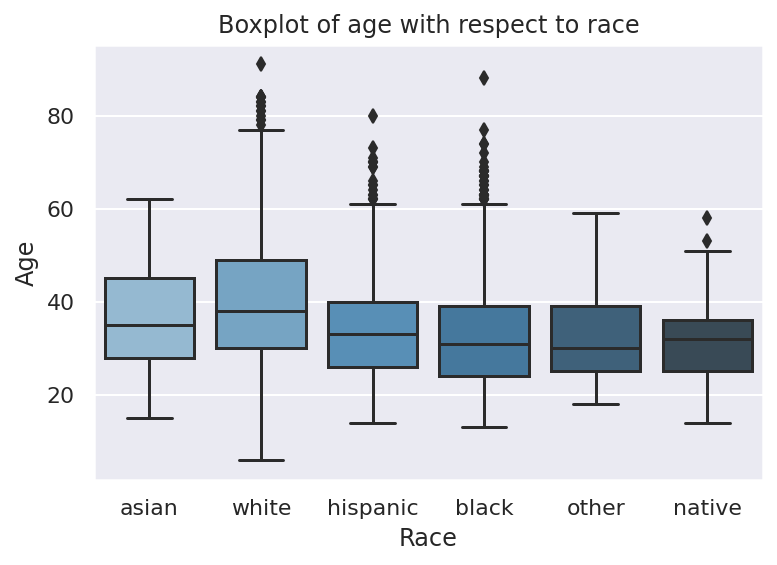

In [ ]:
sns.boxplot(x='race', y='age', data=data, palette='Blues_d')
plt.xlabel("Race")
plt.ylabel("Age")
plt.title("Boxplot of age with respect to race")


White people has the highest variation in age, which is understandable as it is majority race in US.

In [ ]:
fig = px.histogram(data.race, x='race', histfunc='count')
fig.update_layout(
    title_text='Racial Diversity in Fatal Police Shootings',
    xaxis_title_text='Race', 
    yaxis_title_text='Count', 
    bargap=0.2, 
    bargroupgap=0.1 )

In [ ]:
data.race.value_counts(normalize=True)

white       0.510057
black       0.263816
hispanic    0.183753
asian       0.018161
native      0.015817
other       0.008397
Name: race, dtype: float64

It's shown from normalisation of race counts that white has the highest count of deaths and  represent 51 percent of all deaths. I believe the numbers are a bit misleading as the it does not take in cosideration the racial distribution in US.

[Distribution by race ethnicity](https://www.kff.org/other/state-indicator/distribution-by-raceethnicity/?dataView=1&currentTimeframe=0&selectedRows=%7B%22wrapups%22:%7B%22united-states%22:%7B%7D%7D%7D&sortModel=%7B%22colId%22:%22Location%22,%22sort%22:%22desc%22%7D)

In [ ]:
# Creating a distribution by race dataframe

racial_distribution = pd.DataFrame({'race':['white','black','asian','hispanic','native','other'],
'population_2015':[192593600, 37923800, 16755300, 55214300, 1986900, 7810600],
'population_2016':[192537500, 38081700, 17004500, 56144400, 2041500, 8142200],
'population_2017':[192336100, 38408000, 17651200, 57560600, 2039400, 8524700],
'population_2018':[192117000, 38655700, 17844800, 58483600, 2082800, 8795000],
'population_2019':[191757100, 38872200, 18007200, 59102900, 2125700, 8856100]
})

racial_distribution

,race,population_2015,population_2016,population_2017,population_2018,population_2019
0,white,192593600,192537500,192336100,192117000,191757100
1,black,37923800,38081700,38408000,38655700,38872200
2,asian,16755300,17004500,17651200,17844800,18007200
3,hispanic,55214300,56144400,57560600,58483600,59102900
4,native,1986900,2041500,2039400,2082800,2125700
5,other,7810600,8142200,8524700,8795000,8856100


In [ ]:
# as we do not have data for 2020 i will use average

racial_distribution['average_5year_pupulation']= racial_distribution.iloc[:,1:6].mean(axis=1)
racial_distribution['average_population_per_mil'] = racial_distribution['average_5year_pupulation'] / 1000000
racial_distribution = racial_distribution[['race','average_5year_pupulation','average_population_per_mil']]

In [ ]:
# creating a dataframe with yearly deaths by race
deaths = data[['race','id','year']].groupby(['race','year']).count()['id'].reset_index()

# merging racial diversity data frame and deaths by race
merged = deaths.merge(racial_distribution, on='race').rename(columns={'id':'deaths'})

# calculating deaths per million people in race
merged['deaths_per_mil'] = merged.deaths / merged.average_population_per_mil


In [ ]:
# removed "other" from races as it is not descriptive
most_common_races = merged.set_index('race').drop(index='other').reset_index()


Text(17.616718055555552, 0.5, 'Deaths per million')

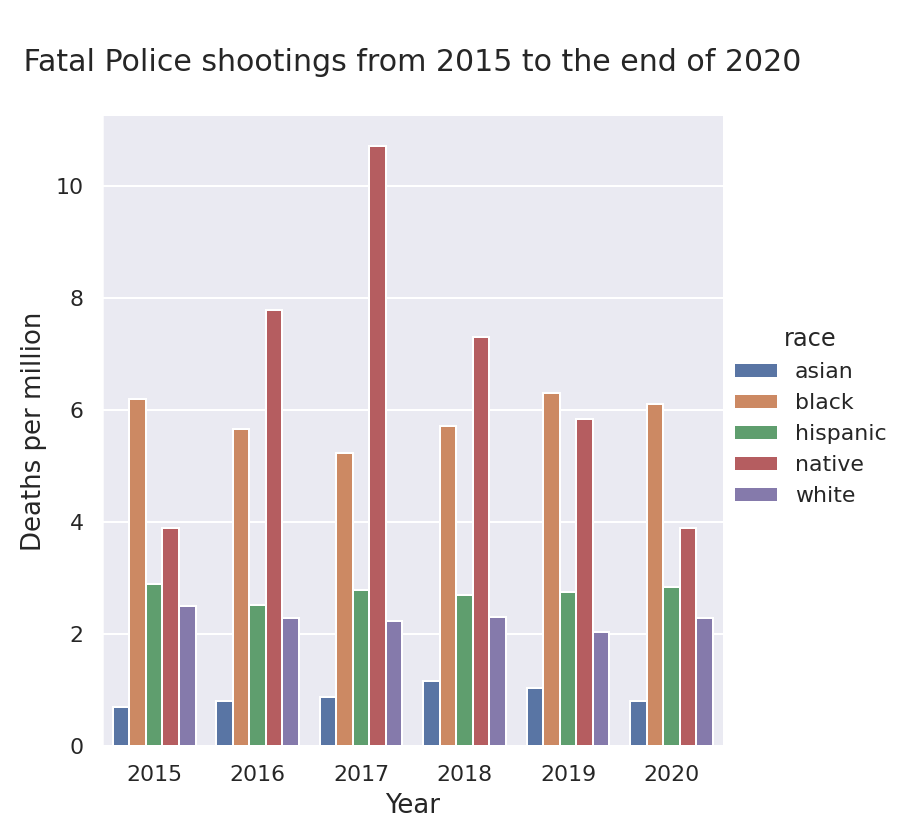

In [ ]:
# add title and fix names of the graph
sns.catplot(data=most_common_races, x='year',y='deaths_per_mil',hue='race',kind='bar')
plt.title('\n Fatal Police shootings from 2015 to the end of 2020 \n', fontsize=15)
plt.xlabel('Year', fontsize=13)
plt.ylabel('Deaths per million', fontsize=13)

Due to being the minority it has the highest death count per milion people. It's not surprising as we have seen Alaska being number one country for fatal police shootings in US.

Nevertheless second highest throughout the years are the black peope and third is hispanic.

To do have a deeper look, lets calculate five year  police shootings ratios per race

In [ ]:
five_year_death_ratio_per_race = {
    'white':[2581/192268260], 'black':[1332/38388280],'hispanic':[926/57301160],
    'asian':[89/17452600],'native':[80/2055260]}

five_year_death_ratio_per_race = pd.DataFrame(data=five_year_death_ratio_per_race)
five_year_death_ratio_per_race

,white,black,hispanic,asian,native
0,0.000013,0.000035,0.000016,0.000005,0.000039


This means by proportion of the population the amount of people killed from law enforcement by race is:
* White (.0013%)
* Black (.0035%)
* Hispanic (.0016%)
* Asian (.0005%)
* Native American (.0039%) 

As mentioned above, the high proportion of Native Americans killed in fatal police shootings is high as it is the minority in the US which has a average population (2015-2020) of just above 2 million

I want to put extreme emphasis that there the proportion of black people kiled is 2,69 times greater than white people and 2,18 times greater than hispanic.

Probably there are a many reasons behind it that are beyond my understanding.

Nevertheless taking in concideration that first age quartile described before consist of people whos age is lower than 27 year old i strongly believe it has a strong connection to education.  
Quote from [National Centre for Education statistics](https://nces.ed.gov/programs/raceindicators/indicator_RFA.asp):  
*In 2016, the percentage of adults age 25 and older who had not completed high school was highest for Hispanic adults (33 percent) followed by 17 percent of American Indian Alaska Native adults..*  
**Problem / Solution No.4:** [Education reduces crime rates ](https://criminal-justice.iresearchnet.com/crime/education-and-crime/4/)


What is more, as we can see in the data (2015-2019)  at [The Annie E. foundation](https://datacenter.kidscount.org/data/line/107-children-in-single-parent-families-by-race?loc=1&loct=1#1/any/false/1729,37,871,870,573/asc/10,11,9,12,1,185,13/431) more than 60% of black american families are raised by single parent, followed by native americans with ~52%, hispanic and latino has ~42%.








### Significance testing:

As we have noticed earlier, education plays important role in reducing crime rates.

With significance testing task i would like to test:  
Whether there is a significance ( confidence 95%) difference in age of victims of police shootings between 2015 and 2020 
(in age group 0-14 years (children), 15-24 years (early working age))


control group 2015  
experiment group 2020

control = count of <=24 y.o / total deaths (in 2015)  
experiment = count of <=24 y.o / total deaths (in 2020)

[source for age division](https://www.indexmundi.com/united_states/age_structure.html)

---
###Hypothesis:

H(0): There is no diference between the control and experiment groups

>Ho: μ1 = μ2


H(a): We do not know weather experiment group will do better or not, therefore we will use two-tailed test.

>Ha: μ1 ≠ μ2

For hypothesis testing we will perform *Two-tailed T-test* because:
* The samples are independent.
* Each population is at least 20 times larger than its respective sample


Text(0.5, 1.0, 'Control Group Age Division (2015)')

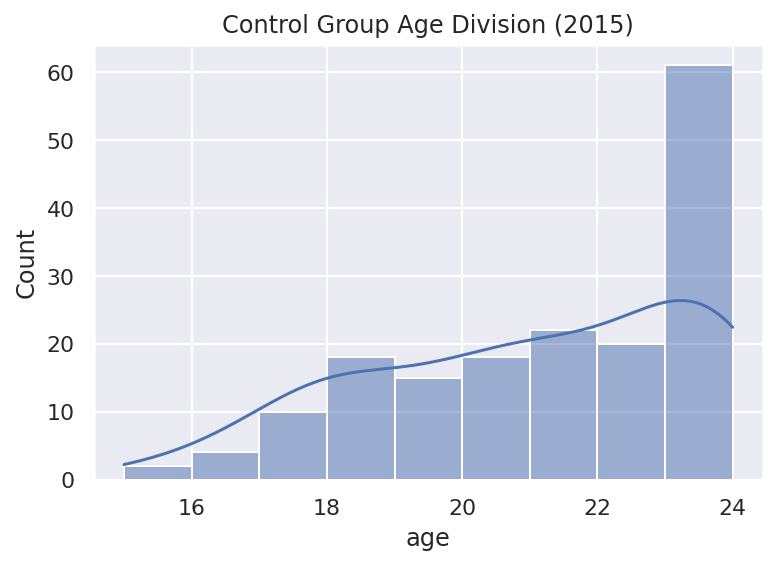

In [ ]:
# creating a control group with age restrictions.
  # removing two 6 year old deaths as an outlier
control_group_age = data[(data['year'] == 2015) & (data['age'] <= 24 ) &
                         (data['age'] > 6)]['age']
sns.histplot(control_group_age,kde=True)
plt.title("Control Group Age Division (2015)")

Text(0.5, 1.0, 'Experiment Group Age Division (2020)')

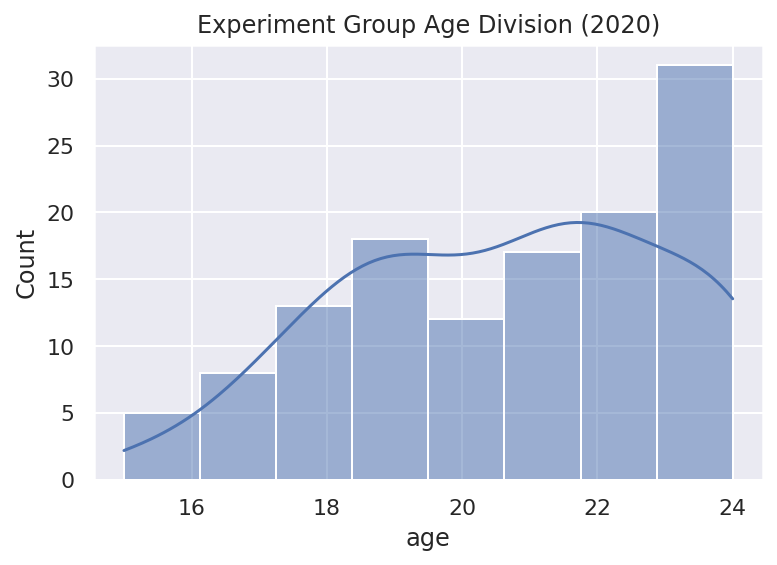

In [ ]:
experiment_group_age = data[(data['year'] == 2020) & (data['age'] <= 24 ) & 
                            (data['age'] > 6)]['age']
sns.histplot(experiment_group_age, kde=True)
plt.title("Experiment Group Age Division (2020)")

In [ ]:
# calculating the size of control and experiment group samples

control_group_total_deaths = data[(data['year'] == 2015) & (data['age'] <= 24 ) & 
                            (data['age'] > 6)].count()['id']
experiment_group_total_deaths = data[(data['year'] == 2020) & (data['age'] <= 24 ) & 
                            (data['age'] > 6)].count()['id']

##### T - test


In [ ]:
# the critical value is calculated using Percent Point Function (PPF) for a given significance level
  # Confidence level = 95%
df = control_group_total_deaths + experiment_group_total_deaths - 2


alpha = 0.05 # calculating significance level with formula alpha = 1 - confidence level

cv = t.ppf(1.0 - alpha,df) #calculating critical value

death_t_stats, death_p_value = stats.ttest_ind(control_group_age, experiment_group_age)
print(' Critical value: {}'.format(round(cv,3)),'\n',
      'T-statistics value: {}'.format(round(death_t_stats,3)),'\n',
      'P-value: {}'.format(round(death_p_value,3)))

 Critical value: 1.65 
 T-statistics value: 1.294 
 P-value: 0.197


In [ ]:
if abs(death_t_stats) <= cv:
  print('We fail to reject null hypothesis')
else:
  print('We reject the null hypothesis')

We fail to reject null hypothesis


In [ ]:
if death_p_value > alpha:
  print('We fail to reject null hypothesis')
else:
  print('We reject the null hypothesis')

We fail to reject null hypothesis


Both results gives us the same answer, *We fail to reject null hypothesis*, therefore we can say that there is no significant difference between the age groups of 2015 and 2020.  

It ensures that we must pay more attention to the education, to keep young people off the crime.

### PCA / t-SNE and linear model creation
For PCA and TSNE we will create a copy of a dataset.

We will try to predict the race of a person providing the features.

In [ ]:
data_copy = data.copy()
data_copy.dtypes

id                                  int64
date                       datetime64[ns]
manner_of_death                    object
armed                              object
age                               float64
gender                             object
race                               object
city                               object
state                              object
signs_of_mental_illness              bool
threat_level                       object
flee                               object
body_camera                          bool
year                                int64
month                               int64
day                                 int64
dtype: object

First 13 arms respond for 95 percent of all mentioned in the dataset, therefore i will join two variables with similar names and merge the 5 under the name "other' to reduce the high cardinality of the column.

In [ ]:
# merging similar names
data_copy.armed = data_copy.armed.replace(['undetermined', 'unknown weapon'], "unknown weapon")

#creating a list of mostly used arms
armed_list = ['gun', 'knife', 'unarmed', 'unknown weapon', 
                  'toy weapon', 'vehicle' , 'machete' , 'Taser' , 'sword' ,
                  'ax' , 'baseball bat' , 'hammer']

for name in data_copy.armed:
  if name not in armed_list:
    data_copy.armed.replace(name, 'other', inplace=True)

In [ ]:
data_copy.armed.value_counts(normalize=True)[:13].sum()

1.0000000000000002

In [ ]:
# removing some non related or duplicate features
data_copy = data_copy.drop(['date', 'id', 'year', 'month', 'day'], axis=1)

In [ ]:
X = data_copy.drop(['race'],axis=1)
y = data_copy['race']

OHE = OneHotEncoder(sparse=False)
X_ohe = OHE.fit_transform(X)

 
label_encoder = LabelEncoder()
y_lab_enc = label_encoder.fit_transform(y)
y_lab_enc

fitting = PCA()
PCA_fit = fitting.fit_transform(X_ohe)

In [ ]:
exp_var_cumul = np.cumsum(fitting.explained_variance_ratio_)

px.area(
    x=range(1, exp_var_cumul.shape[0] + 1),
    y=exp_var_cumul,
    labels={"x": "# Components", "y": "Explained Variance"}
)

As 2 components represents only 19.1% of variance of all dimensions, we can not visually represent it.
1074 components would explain 95% of variance. I have chosen to use 370 components  whicg will represent 90% variance.

In [ ]:
# reducing dimensions before moving to t-sne
PC_370 = PCA(n_components=370, random_state=11)
PC_370 = PC_370.fit_transform(X_ohe)

In [ ]:
# fitting TSNE with data
race_tsne = TSNE(random_state=11,verbose=1, perplexity=60, n_components=2,
                 n_iter=1000, learning_rate=200).fit_transform(PC_370)

[t-SNE] Computing 181 nearest neighbors...
[t-SNE] Indexed 5121 samples in 0.276s...
[t-SNE] Computed neighbors for 5121 samples in 25.969s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5121
[t-SNE] Computed conditional probabilities for sample 2000 / 5121
[t-SNE] Computed conditional probabilities for sample 3000 / 5121
[t-SNE] Computed conditional probabilities for sample 4000 / 5121
[t-SNE] Computed conditional probabilities for sample 5000 / 5121
[t-SNE] Computed conditional probabilities for sample 5121 / 5121
[t-SNE] Mean sigma: 0.811136
[t-SNE] KL divergence after 250 iterations with early exaggeration: 79.476288
[t-SNE] KL divergence after 1000 iterations: 1.686848


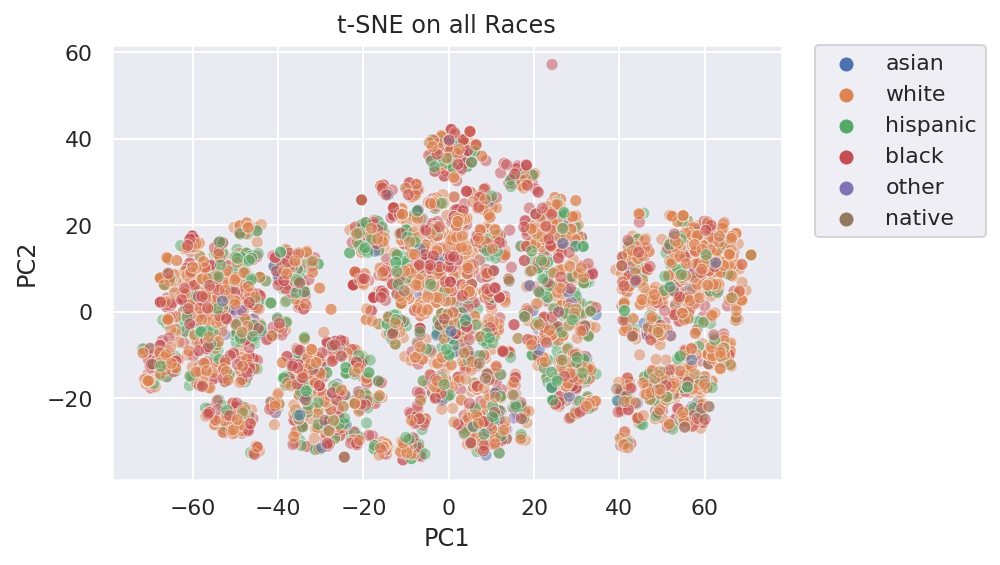

<Figure size 720x1080 with 0 Axes>

In [ ]:

sns.scatterplot(x=race_tsne[:,0],y=race_tsne[:,1],hue=y,legend=True, alpha=0.5)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('T-SNE on all Races') 
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.figure(figsize=(10,15))
plt.show()

Text(0.5, 1.0, 'Elbow curve')

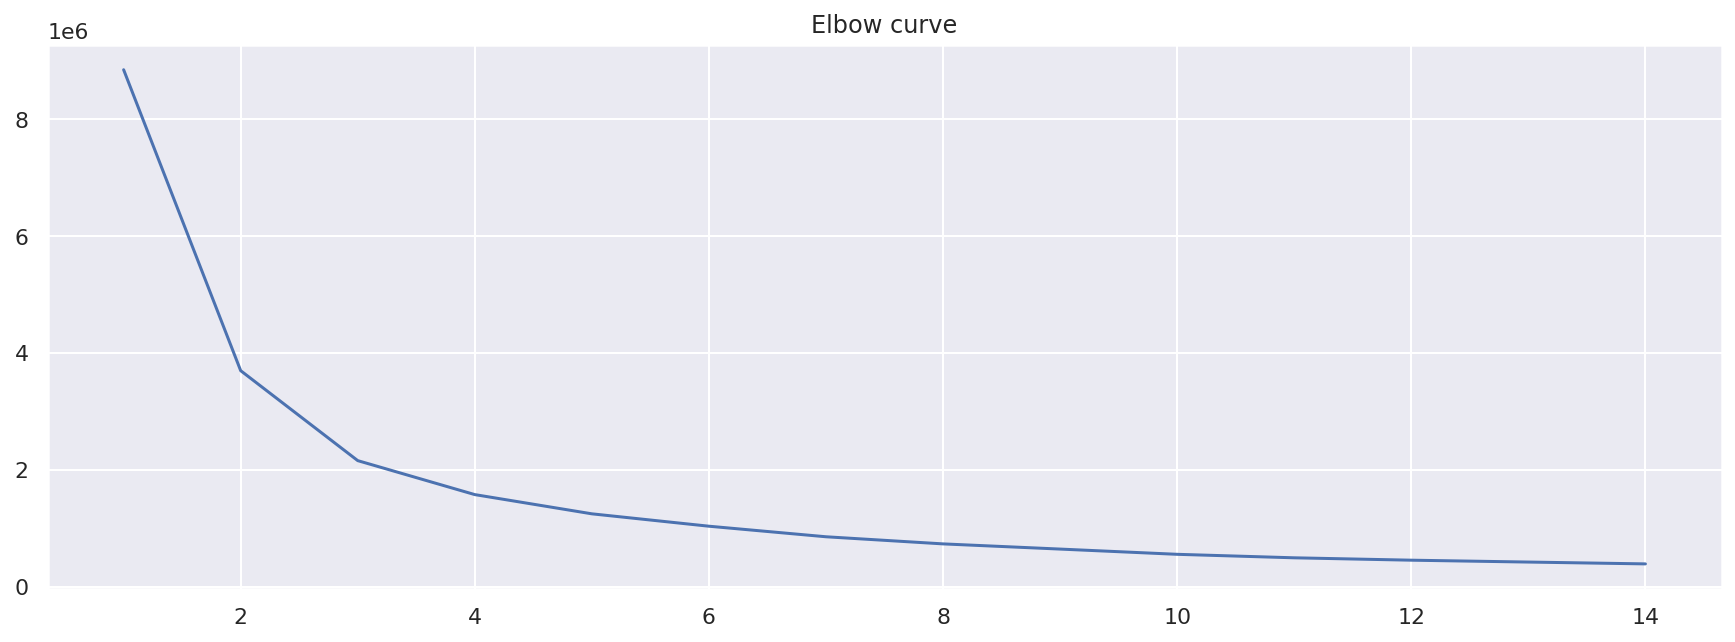

In [ ]:

distorsions = []
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(race_tsne)
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(1, 15), distorsions)
plt.title('Elbow curve')

In [ ]:
Kmean = KMeans(n_clusters=3)
Kmean.fit(race_tsne)
y_kmeans= Kmean.predict(race_tsne)

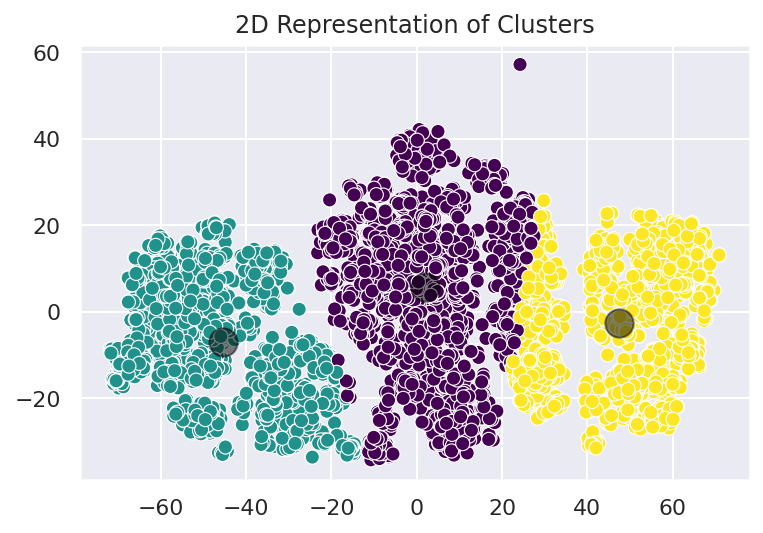

In [ ]:
sns.scatterplot(x=race_tsne[:, 0], y=race_tsne[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = Kmean.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.title('2D Representation of Clusters')
plt.show()

In [ ]:
df_pca_kmeans = pd.concat([data_copy.reset_index(drop=True), pd.DataFrame(race_tsne).iloc[:,0:2]],axis=1, sort=False)
df_pca_kmeans.columns.values[-2:] = ['PC1', 'PC2']
df_pca_kmeans['segment'] = kmeans.labels_
df_pca_kmeans[df_pca_kmeans.segment==4].head(20)

,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,PC1,PC2,segment
275,shot,gun,25.0,Male,hispanic,Mission,TX,False,other,Not fleeing,False,31.079430,17.170013,4
296,shot,hammer,20.0,Male,black,Detroit,MI,False,other,Not fleeing,False,23.019964,2.430844,4
335,shot,sword,27.0,Male,white,Ruidoso,NM,False,other,Not fleeing,False,20.182486,5.789017,4
398,shot,unknown weapon,46.0,Male,black,Miami,FL,False,other,Not fleeing,False,33.635300,9.170985,4
468,shot,sword,21.0,Male,black,Kansas City,MO,False,other,Not fleeing,False,18.827488,6.062727,4
574,shot,gun,29.0,Male,hispanic,San Jose,CA,False,other,Not fleeing,False,22.452139,10.105868,4
658,shot,gun,27.0,Male,black,Alexandria,LA,False,other,Not fleeing,False,23.519882,14.745476,4
735,shot,gun,31.0,Male,black,Palm Beach Gardens,FL,False,undetermined,Not fleeing,False,14.270381,18.868444,4
747,shot,unknown weapon,53.0,Male,white,Pine Top,KY,False,other,Not fleeing,False,31.102716,7.831013,4
802,shot,hammer,31.0,Male,hispanic,Jurupa Valley,CA,False,other,Not fleeing,False,23.168274,3.311206,4


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_ohe, y_lab_enc,
                                                    test_size = 0.2,
                                                    random_state = 11,
                                                    stratify = y_lab_enc)

In [ ]:
logreg = LogisticRegression(max_iter=100000, random_state=11,
                            solver='newton-cg', class_weight='balanced')
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100000, multi_class='auto', n_jobs=None,
                   penalty='l2', random_state=11, solver='newton-cg',
                   tol=0.0001, verbose=0, warm_start=False)

In [ ]:
cross_val_score(logreg, X_train, y_train, cv=4, scoring='accuracy', ).mean()

0.5546875

In [ ]:
Logistic_regression_prediction = logreg.predict(X_test)

accuracy = accuracy_score(y_test, Logistic_regression_prediction)
print('Accuracy: %.2f ' % (accuracy*100)) 

Accuracy: 51.22 
